In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
# Read the data from a csv
airline = pd.read_csv('airline_passengers.csv', index_col="Month")
airline.count()

Thousands of Passengers    144
dtype: int64

In [6]:
airline.head()

,Thousands of Passengers
Month,
1949-01,112.0
1949-02,118.0
1949-03,132.0
1949-04,129.0
1949-05,121.0


In [3]:
# bit of clean up
airline.dropna(inplace=True)
# Index the datframe by the Month column
airline.index = pd.to_datetime(airline.index)
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


In [4]:
# Create 6 and 12 month simple moving averages (SMA)
airline['6-month-sma'] = airline['Thousands of Passengers'].rolling(window=6).mean()
airline['12-month-sma'] = airline['Thousands of Passengers'].rolling(window=12).mean()

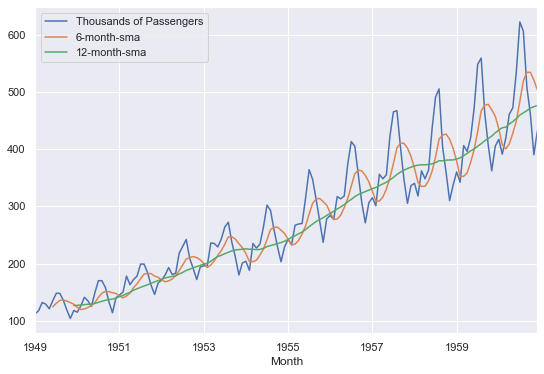

In [5]:
airline.plot(figsize=(9,6))

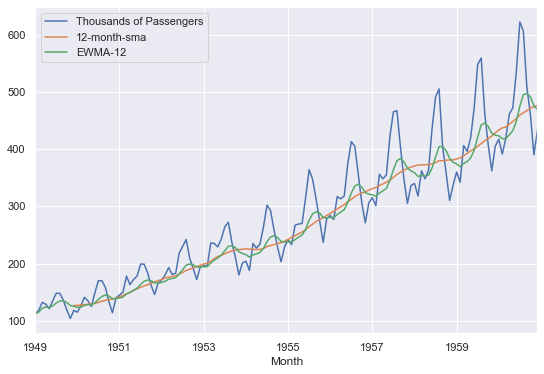

In [6]:
# Create an EWMA (Exponentially Weighted Mean Average)
airline['EWMA-12'] = airline['Thousands of Passengers'].ewm(span=12).mean()
airline[['Thousands of Passengers','12-month-sma','EWMA-12']].plot(figsize=(9,6))